In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [421]:
df['Attrition1'] = df['Attrition'].map({"Yes":1,"No":0})

#### Headmap

<AxesSubplot:>

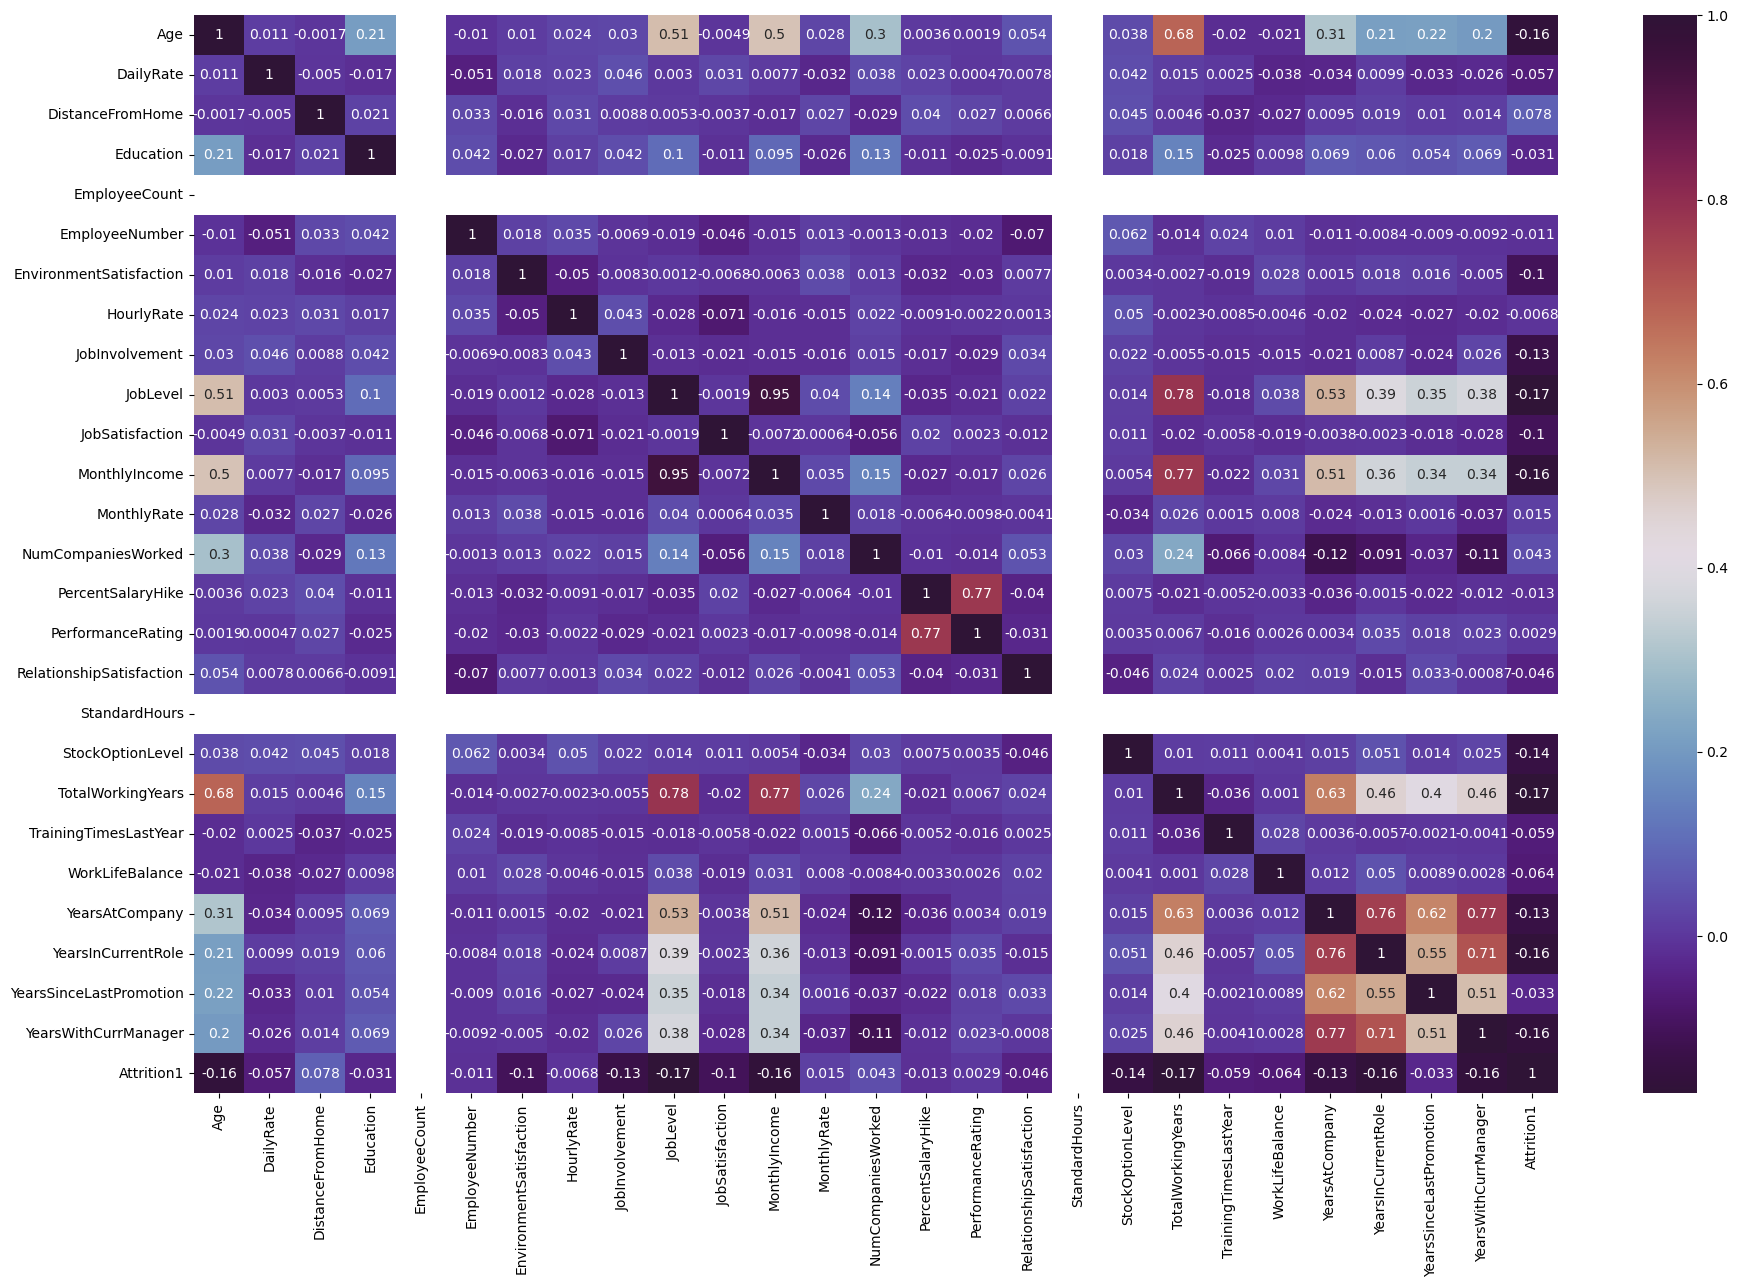

In [422]:
plt.figure(figsize=(22,14))
sns.heatmap(df.corr(), cmap='twilight_shifted',annot=True,)

In [423]:
del df['Attrition1']

# Attrition across all the features

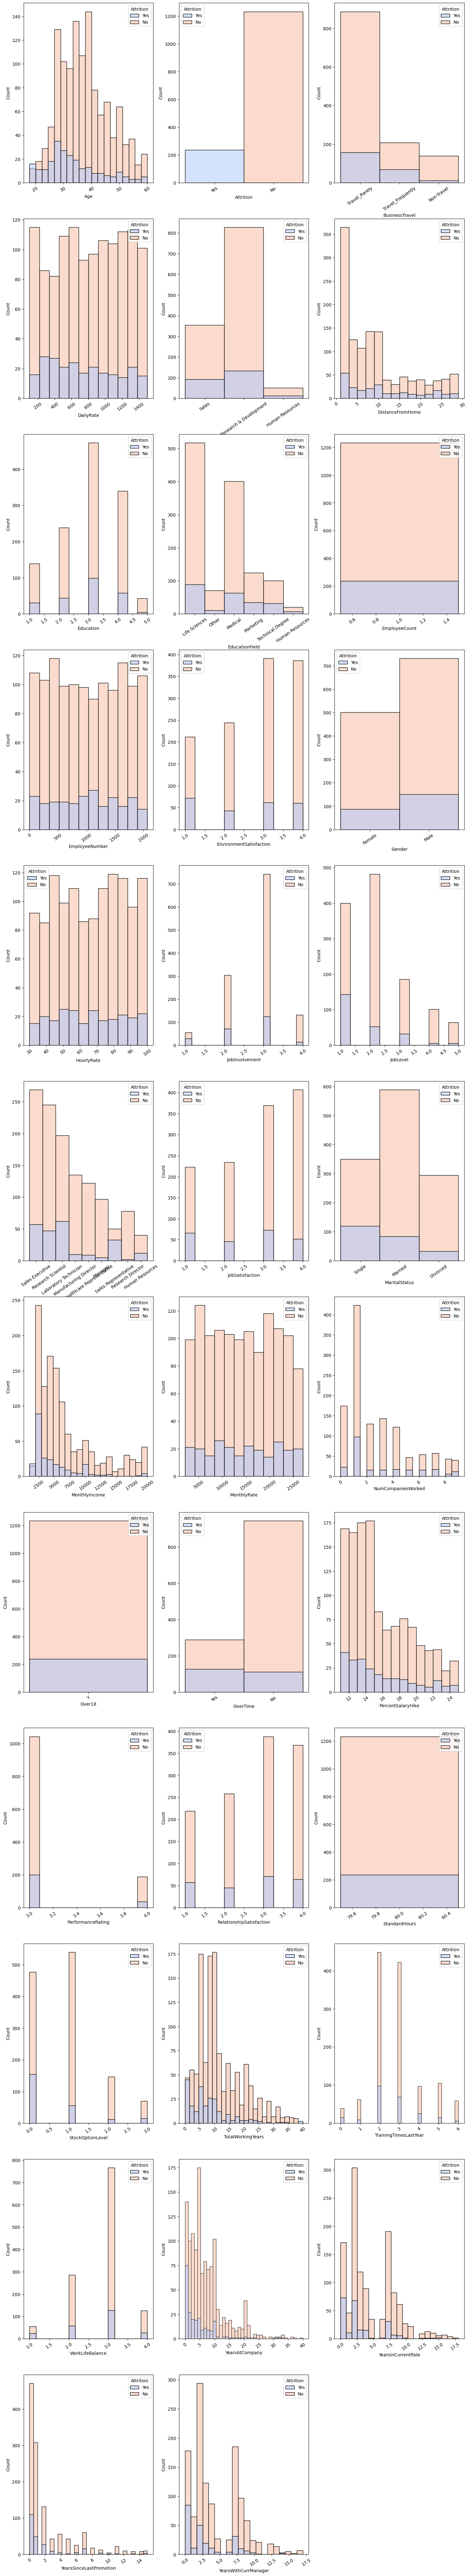

In [53]:
f = plt.figure(figsize=(18,len(df.columns)*3))
for i, col in enumerate(df.columns):
    f.add_subplot(int(np.ceil(len(df.columns)/3)), 3, i+1)
   # sns.countplot(x=col, data=df1)
    sns.histplot(data=df, x=col,hue='Attrition',palette='coolwarm')
    plt.xticks(rotation=35);
    

### Unique values

In [404]:
for i in df.columns:
    print(i)
    print("Unique values: " + str(len(df[i].unique())))
    print(type(df[i][0]))
    print(df[i].unique()[:15])
    print()

Age
Unique values: 43
<class 'numpy.int64'>
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28]

Attrition
Unique values: 2
<class 'str'>
['Yes' 'No']

BusinessTravel
Unique values: 3
<class 'str'>
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

DailyRate
Unique values: 886
<class 'numpy.int64'>
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103]

Department
Unique values: 3
<class 'str'>
['Sales' 'Research & Development' 'Human Resources']

DistanceFromHome
Unique values: 29
<class 'numpy.int64'>
[ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9]

Education
Unique values: 5
<class 'numpy.int64'>
[2 1 4 3 5]

EducationField
Unique values: 6
<class 'str'>
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

EmployeeCount
Unique values: 1
<class 'numpy.int64'>
[1]

EmployeeNumber
Unique values: 1470
<class 'numpy.int64'>
[ 1  2  4  5  7  8 10 11 12 13 14 15 16 18 19]

EnvironmentSatisfaction
Unique values: 4
<class 'numpy.int64'>
[2 

## Feature engineering


In [8]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [425]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [405]:
X = df[['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]

In [406]:
X = pd.get_dummies(X,columns=[ 'Gender', 'OverTime'],drop_first=True)

In [407]:
X = pd.get_dummies(X,columns=['BusinessTravel', 'Department', 'EducationField', 'JobRole','MaritalStatus'])
X

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Male,OverTime_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,4,2571,12290,4,17,3,3,80,1,17,3,3,5,2,0,3,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1466,39,613,6,1,1,2062,4,42,2,3,1,9991,21457,4,15,3,1,80,1,9,5,3,7,7,1,7,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1467,27,155,4,3,1,2064,2,87,4,2,2,6142,5174,1,20,4,2,80,1,6,0,3,6,2,0,3,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1468,49,1023,2,3,1,2065,4,63,2,2,2,5390,13243,2,14,3,4,80,0,17,3,2,9,6,0,8,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [408]:
y = df['Attrition']

In [409]:
y = y.map({"Yes":1,"No":0})

# Cross validation
#### Multiple Models Comparison - Models selection



In [410]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [411]:
from sklearn.preprocessing import StandardScaler

##### StandardScaler for KNeighborsClassifier and SVC
https://builtin.com/data-science/when-and-why-standardize-your-data

In [412]:
scaler = StandardScaler()

In [413]:
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [15]:
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
import lightgbm
import catboost
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier


In [16]:
num_folds = 10
scoring = 'accuracy'
models = []
models.append(('LogisticRegression', LogisticRegression(max_iter=1000000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC(max_iter=1000000)))
models.append(('CatBoost', catboost.CatBoostClassifier(silent=True)))
models.append(('LightGBR', lightgbm.LGBMClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('GradientBoosting', GradientBoostingClassifier()))



In [17]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [27]:
results = []
names = []
res = pd.DataFrame(columns=['model', 'mean', 'std'])
res

for name, model in models:
    if (name=='KNN') or (name=='SVC'):
        cv_results = cross_val_score(model, X_train_s, y_train, cv=10, scoring='accuracy')
    else:
        cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

    res = pd.concat([res,pd.DataFrame({'model': [name], 'mean': [cv_results.mean()],'std': [cv_results.std()]},columns=['model', 'mean', 'std'] )])
    
    
res = res.reset_index(drop=True)   

LogisticRegression: 0.869751 (0.026631)
KNN: 0.825052 (0.014666)
SVC: 0.850343 (0.019968)
CatBoost: 0.862974 (0.019632)
LightGBR: 0.856187 (0.024399)
XGB: 0.845479 (0.029600)
RandomForest: 0.851333 (0.016108)
AdaBoost: 0.861993 (0.017328)
GradientBoosting: 0.859071 (0.020594)


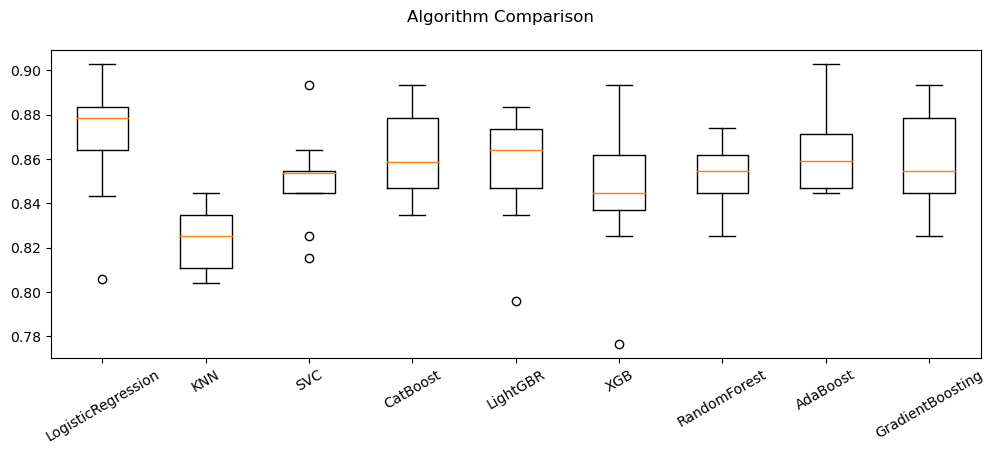

In [28]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(12,4)
plt.xticks(rotation=30);

#### Top 5 models of Cross validation Analysis

In [473]:
res.sort_values('mean',ascending=False)[:5]

,model,mean,std
0,LogisticRegression,0.869751,0.026631
3,CatBoost,0.862974,0.019632
7,AdaBoost,0.861993,0.017328
8,GradientBoosting,0.859071,0.020594
4,LightGBR,0.856187,0.024399


## Hyperparameter tuning and Best Model Selection 
  #### of top 5 models (coming from Cross validation Analysis)

In [21]:
from sklearn.model_selection import GridSearchCV

In [426]:
pipe = Pipeline([
    ("classifier", AdaBoostClassifier())])
sp = [
    {"classifier": [catboost.CatBoostClassifier(silent=True),AdaBoostClassifier(),GradientBoostingClassifier(),lightgbm.LGBMClassifier()],
    "classifier__n_estimators": [50,100,120,150]},
    {"classifier": [LogisticRegression(max_iter=10000000)],
    "classifier__C" : [0.1, 1.0, 5.0, 10.0]}
   ]

In [427]:
grid = GridSearchCV(pipe, sp, cv=10, verbose=0)

In [428]:
ml_g = grid.fit(X_train,y_train)

In [429]:
ml_g.best_params_

{'classifier': LogisticRegression(C=5.0, max_iter=10000000),
 'classifier__C': 5.0}

In [430]:
p2 = ml_g.predict(X_test)
accuracy_score(y_test,p2)

0.8866213151927438

### LogisticRegression - Coefficients as Feature Importance

In [434]:
coef_df = pd.DataFrame({'coef':ml_g.best_estimator_.steps[0][1].coef_.tolist()[0],'coef_abs': abs(ml_g.best_estimator_.steps[0][1].coef_).tolist()[0],'name':X_test.columns})
coef_df.sort_values('coef_abs',ascending=False)

,coef,coef_abs,name
27,2.061230,2.061230,OverTime_Yes
29,0.704373,0.704373,BusinessTravel_Travel_Frequently
51,0.679560,0.679560,MaritalStatus_Single
28,-0.639927,0.639927,BusinessTravel_Non-Travel
8,-0.554354,0.554354,JobInvolvement
49,-0.515549,0.515549,MaritalStatus_Divorced
42,0.514372,0.514372,JobRole_Laboratory Technician
39,0.485112,0.485112,EducationField_Technical Degree
35,-0.448659,0.448659,EducationField_Life Sciences
40,-0.430547,0.430547,JobRole_Healthcare Representative


# SHAP 
##### SHAP (SHapley Additive exPlanations) is a method to explain individual predictions (...)
https://christophm.github.io/interpretable-ml-book/shap.html
##### CatBoost 

In [433]:
m1 = catboost.CatBoostClassifier(silent=True)
m1.fit(X_train,y_train)
p3 = m1.predict(X_test)
accuracy_score(y_test,p3)

0.8820861678004536

In [57]:
import shap

In [61]:
explainer = shap.TreeExplainer(m1)

In [62]:
shap_values = explainer.shap_values(X_test)

### Feature Importance 
#### General Overview for the entire test dataset 

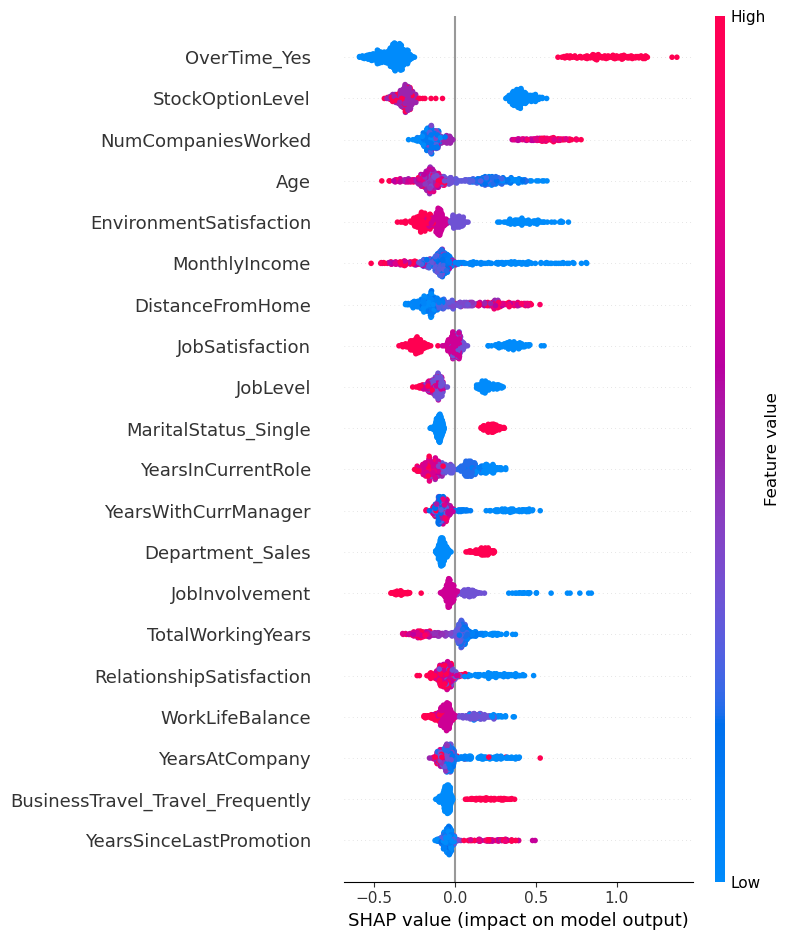

In [63]:
shap.summary_plot(shap_values, X_test,feature_names=X_test.columns)

### Feature Importance 
#### Detailed Overview at a row level - features contribution for each row prediction 
#### Top 10 features affecting the given prediction 

In [438]:
l = list()

for i in range(len(shap_values)):  
    d = dict(zip(X_test.columns,shap_values[i]))
    a = sorted(d.items(), key=lambda x:x[1])
    l.append(a[-5:]+a[:5])
    
X_test['top 10 features'] = l
X_test['top 10 features'] = X_test['top 10 features'].map(lambda x: str(x).replace('(','').replace('[','').replace(')','').replace(']','')) 
X_test['top 10 features'] = X_test['top 10 features'].map(lambda x: str(x).replace('(','').replace('[','').replace(')','').replace(']','').replace("',",':').replace("'",'')) 

In [462]:
pd.set_option('display.max_colwidth', 40)
X_test.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Male,OverTime_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,top 10 features
1041,28,866,5,3,1,1469,4,84,3,2,1,8463,23490,0,18,3,4,80,0,6,4,3,5,4,1,3,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,"Age: 0.11023376519409765, Department..."
184,53,1084,13,2,1,250,4,57,4,2,1,4450,26250,1,11,3,3,80,2,5,3,3,4,2,1,3,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,YearsInCurrentRole: 0.06837368734170...
1222,24,240,22,1,1,1714,4,58,1,1,3,1555,11585,1,11,3,3,80,1,1,2,3,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,"JobInvolvement: 0.3319672170174111, ..."
67,45,1339,7,3,1,86,2,59,3,3,1,9724,18787,2,17,3,3,80,1,25,2,3,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,"Gender_Male: 0.0470561867993165, Yea..."
220,36,1396,5,2,1,304,4,62,3,2,2,5914,9945,8,16,3,4,80,0,16,3,4,13,11,3,7,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,"Gender_Male: 0.06398628041974455, Jo..."


## Take a look for most likely reasons of potencial leave - individually for each employee 
'top 10 features' column 

In [471]:
pd.set_option('display.max_colwidth', 150)
pd.DataFrame(X_test['top 10 features']).head()

,top 10 features
1041,"Age: 0.11023376519409765, Department_Sales: 0.2010747740191017, MaritalStatus_Single: 0.21452624666791073, JobSatisfaction: 0.3971563680058506, St..."
184,"YearsInCurrentRole: 0.06837368734170568, EducationField_Life Sciences: 0.07213196456797089, TotalWorkingYears: 0.12741376090958526, DistanceFromHo..."
1222,"JobInvolvement: 0.3319672170174111, Age: 0.35190460025188913, DistanceFromHome: 0.3543918949350021, YearsWithCurrManager: 0.4125919551922299, Mont..."
67,"Gender_Male: 0.0470561867993165, YearsAtCompany: 0.148554251192804, YearsInCurrentRole: 0.1607244956067737, YearsWithCurrManager: 0.24411914043078..."
220,"Gender_Male: 0.06398628041974455, JobRole_Laboratory Technician: 0.07874650878358853, MaritalStatus_Single: 0.18866020511291895, StockOptionLevel:..."


In [472]:
pd.set_option('display.max_colwidth', 40)